In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
# Read data
data = pd.read_csv("../Data/raw/Customers.csv")

In [3]:
# Shape
data.shape

(2000, 8)

In [4]:
# View data
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
# Metadata information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
# Summary Statistics
data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [7]:
# Check for duplicates
data.duplicated().sum()

0

In [8]:
# Check for missing values
data.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [9]:
# Rename Columns
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [10]:
# Function to remove space and special character from string.
def rename_col(column_name):
    import re
    new_col_name = re.match(pattern=r'[a-zA-Z ]+', string=column_name).group().strip().replace(" ", "_").lower()
    return new_col_name


data.rename(columns={col: rename_col(col) for col in data.columns}, inplace=True)

#### Data Exploration

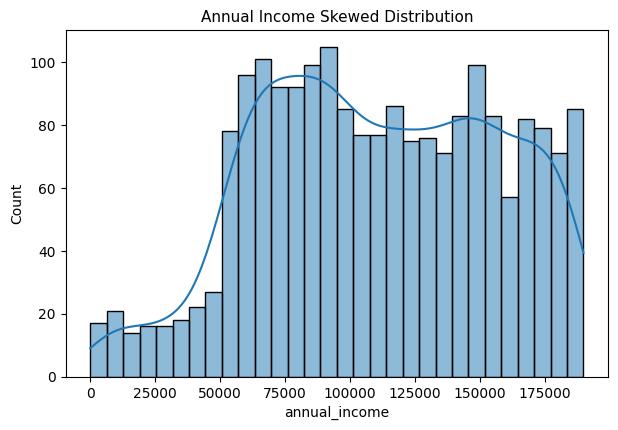

In [11]:
# Data distribution
plt.figure(figsize=(7, 4.5))
sns.histplot(data, x='annual_income', bins=30, kde=True)
plt.title('Annual Income Skewed Distribution', size=11);

- The above plot represent the left skewed distribution of annual income of customers. 
- It shows that there is potential outliers present in data.

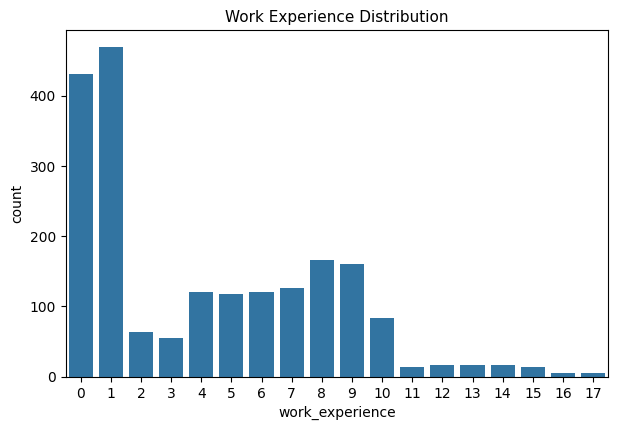

In [12]:
# Data distribution
plt.figure(figsize=(7, 4.5))
sns.countplot(data, x='work_experience')
plt.title('Work Experience Distribution', size=11);

- The above bar plot shows the distribution of work experience of each customer.
- The highest number of customers are with experience of one year and with zero year of experience.
- Whereas, the cusomters with experience of 17 years are least.

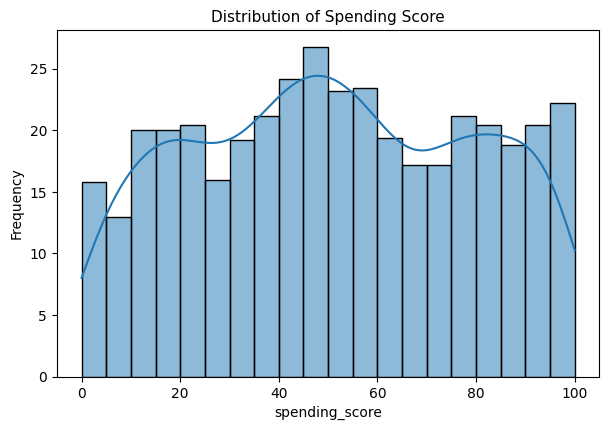

In [13]:
# Data distribution
plt.figure(figsize=(7, 4.5))
sns.histplot(data, x='spending_score', bins=20, kde=True, stat='frequency')
plt.title('Distribution of Spending Score', size=11);

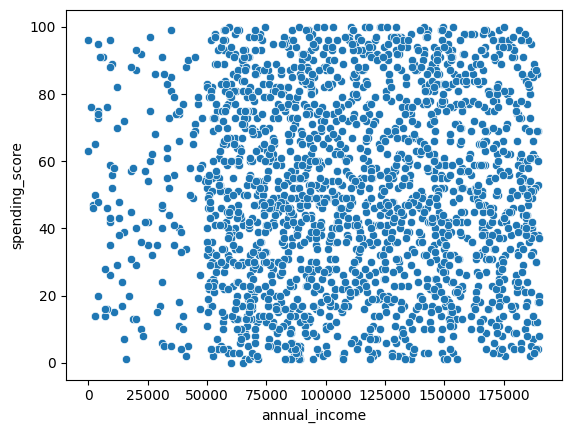

In [14]:
# Relation between annual salary and work experience.
sns.scatterplot(data, x='annual_income', y='spending_score');

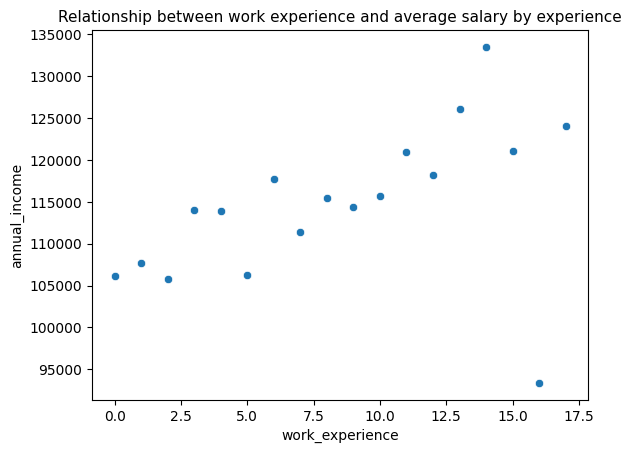

In [15]:
# Relation between annual salary and work experience.
pivot_data = pd.pivot_table(data, values='annual_income', index='work_experience', aggfunc='mean').reset_index()
sns.scatterplot(pivot_data, x='work_experience', y='annual_income')
plt.title('Relationship between work experience and average salary by experience', size=11);

- The scatter plot shows the positive relation between work experience and annual income.

In [16]:
# Spending Score by Gender
data.groupby(by=['gender'])['spending_score'].mean()

gender
Female    50.974705
Male      50.944717
Name: spending_score, dtype: float64

In [17]:
# Spending Score by Profession
data.groupby(by=['profession'])['spending_score'].mean()

profession
Artist           52.678105
Doctor           51.900621
Engineer         48.966480
Entertainment    52.940171
Executive        49.901961
Healthcare       50.516224
Homemaker        46.383333
Lawyer           48.859155
Marketing        48.717647
Name: spending_score, dtype: float64

Text(0.5, 1.0, 'Heatmap')

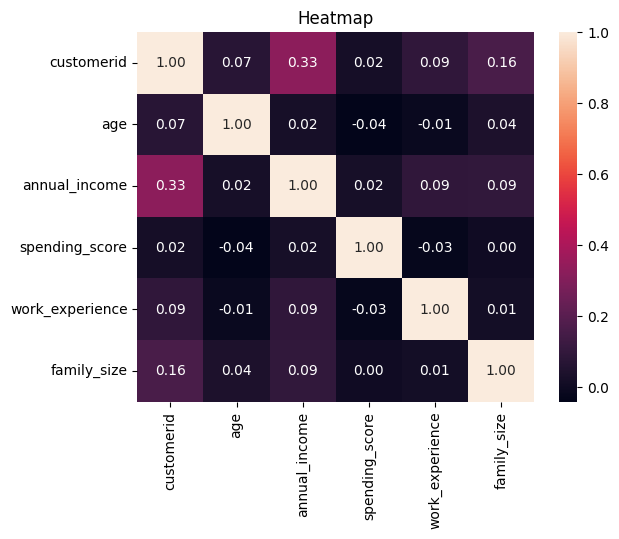

In [18]:
# Heatmap to find relation between features
corr = data.corr(numeric_only=True)

sns.heatmap(data=corr, annot=True, fmt='.2f')
plt.title("Heatmap")

#### Feature Engineering

In [19]:
# Feature Selection
features = ['gender', 'age', 'annual_income', 'profession', 'work_experience', 'family_size']
X = data[features]
y = data['spending_score']

# split the data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Data preprocessing

# Filling missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# Fit the model on training data
imputer = imputer.fit(X_train, y_train)

# Transform the data
X_train_tr = imputer.transform(X_train)
X_test_tr = imputer.transform(X_test)

# Convert array into dataframe
X_train = pd.DataFrame(X_train_tr, columns=features)
X_test = pd.DataFrame(X_test_tr, columns=features)

In [21]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['gender', 'profession']
on_en = OneHotEncoder(sparse_output=False)

# Fit the model on training data
on_en = on_en.fit(X_train[cat_cols])

# Transform the data
X_train_en = on_en.transform(X_train[cat_cols])
X_test_en = on_en.transform(X_test[cat_cols])

# Convert into dataframe
en_col_name = on_en.get_feature_names_out()
X_train_cat = pd.DataFrame(X_train_en, columns=en_col_name)
X_test_cat = pd.DataFrame(X_test_en, columns=en_col_name)

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'annual_income', 'work_experience', 'family_size']

scaler = StandardScaler()

# Fit the model on training data
scaler = scaler.fit(X_train[num_cols], y_train)

# Transform the data
X_train_scale = scaler.transform(X_train[num_cols])
X_test_scale = scaler.transform(X_test[num_cols])

# Convert into dataframe
X_train_num = pd.DataFrame(X_train_scale, columns=num_cols)
X_test_num = pd.DataFrame(X_test_scale, columns=num_cols)

In [23]:
# Concat the data to get the final ouput
final_x_train = pd.concat([X_train_cat, X_train_num], axis=1)
final_x_test = pd.concat([X_test_cat, X_test_num], axis=1)

#### Model Selection

In [24]:
# Import algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score

In [25]:
# Model selection based default setting

models = {
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor(random_state=42), 
    'RF': RandomForestRegressor(random_state=42),
    'GB': GradientBoostingRegressor(random_state=42),
    'XGB': XGBRegressor(random_state=42)
}

score_list = []
for name, model in models.items():
    print(f'{name} model is fitting on training data...')
    scores = cross_val_score(estimator=model, X=final_x_train, y=y_train, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
    avg_score = np.mean(scores)
    score_list.append((name, avg_score))

    print(f'{name} MAE: {avg_score} +-({np.std(scores)})')
    print("---"*10)

KNN model is fitting on training data...
KNN MAE: -25.556499999999996 +-(0.9607029978094163)
------------------------------
DT model is fitting on training data...
DT MAE: -32.369375 +-(1.8046650702069336)
------------------------------
RF model is fitting on training data...
RF MAE: -24.5022875 +-(0.9493785867279193)
------------------------------
GB model is fitting on training data...
GB MAE: -24.313536193764456 +-(0.8316879819607131)
------------------------------
XGB model is fitting on training data...
XGB MAE: -26.982560190651565 +-(1.084072644168344)
------------------------------


In [26]:
scores = pd.DataFrame(score_list, columns=['model', 'score'])
scores['score'] = scores.score * (-1)
scores.set_index(['model'], inplace=True)

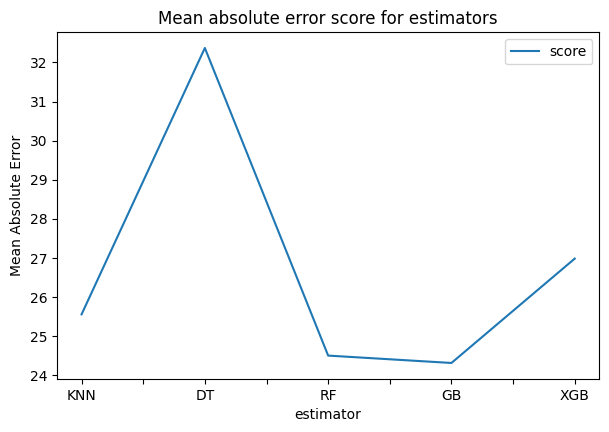

In [27]:
# line plot

scores.plot(kind='line', figsize=(7, 4.5))

plt.title('Mean absolute error score for estimators')
plt.xlabel('estimator')
plt.ylabel('Mean Absolute Error')

plt.show()

- There no large difference between the mean absolute error of estimators.
- Random forest and Gradient boosting estimators have lowest error score.

#### Random Forest Regressor

In [28]:
# Random forest regressor
rf_reg = RandomForestRegressor(n_estimators= 200, 
                                criterion='squared_error',
                                max_depth=3,
                                max_features= 'sqrt',
                                max_leaf_nodes= 2, 
                                n_jobs=-1, 
                                random_state=42)

rf_reg = rf_reg.fit(final_x_train, y_train)

# Make prediction
y_preds = rf_reg.predict(final_x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
# Computer error
mse = mean_squared_error(y_test, y_preds)
print("RMSE: %.3f" %np.sqrt(mse))

RMSE: 27.724


In [31]:
# Find optimum values of number of trees.
n_trees = [100, 200, 300, 500, 800, 1200]

for n_estimator in n_trees:
    reg = RandomForestRegressor(n_estimators=n_estimator, random_state=42)
    reg.fit(final_x_train, y_train)

    # Make prediction
    y_preds = reg.predict(final_x_test)
    mse = mean_squared_error(y_test, y_preds)
    print("n_estimators=%d, RMSE=%.3f" %(n_estimator, np.sqrt(mse)))

n_estimators=100, RMSE=28.884
n_estimators=200, RMSE=28.833
n_estimators=300, RMSE=28.758
n_estimators=500, RMSE=28.698
n_estimators=800, RMSE=28.696
n_estimators=1200, RMSE=28.683


In [32]:
# Find optimum value of the depth of the tree.
max_depths = [3, 5, 7, 9, 11]

for depth in max_depths:
    reg = RandomForestRegressor(max_depth=depth, random_state=42)
    reg.fit(final_x_train, y_train)

    # Make prediction
    y_preds = reg.predict(final_x_test)
    mse = mean_squared_error(y_test, y_preds)
    print("Max-depth=%d, RMSE=%.3f" %(depth, np.sqrt(mse)))

Max-depth=3, RMSE=27.797
Max-depth=5, RMSE=27.832
Max-depth=7, RMSE=27.914
Max-depth=9, RMSE=28.132
Max-depth=11, RMSE=28.255


#### Hyper-parameter tunning

In [34]:
from sklearn.model_selection import GridSearchCV

# Define set of paramter values
param_grids = {
    'n_estimators': [500, 800, 1200, 1500],
    'max_depth':[3, 5, 7, 9, 11],
    'max_leaf_nodes': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Model definition
rf_model = RandomForestRegressor(criterion='absolute_error', random_state=42)

# GridSearch Initialization
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grids, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1
                        )

# fit the model
grid_search.fit(final_x_train, y_train)

KeyboardInterrupt: 

In [ ]:
# 